In [34]:
import pandas as pd
import numpy  as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [3]:
univer=pd.read_csv('C://Users//Curry//Desktop//coursera//Universities.csv')
univer.head(9)

,ID Sector,Sector,ID University,University,ID Year,Year,Completions,Slug University,Geography,ID Geography,Slug Geography
0,9,"Private for-profit, less-than 2-year",190318,Continental School of Beauty Culture-Rochester,2016,2016,237,continental-school-of-beauty-culture-rochester,New York,04000US36,new-york
1,9,"Private for-profit, less-than 2-year",488341,Ferrara's Beauty School,2016,2016,34,ferraras-beauty-school,New York,04000US36,new-york
2,9,"Private for-profit, less-than 2-year",488253,Focus Personal Training Institute,2016,2016,67,focus-personal-training-institute,New York,04000US36,new-york
3,1,"Public, 4-year or above",196015,SUNY College of Technology at Canton,2016,2016,869,suny-college-of-technology-at-canton,New York,04000US36,new-york
4,8,"Private not-for-profit, less-than 2-year",441575,Metropolitan Learning Institute,2016,2016,379,metropolitan-learning-institute,New York,04000US36,new-york
5,1,"Public, 4-year or above",196024,SUNY College of Technology at Delhi,2016,2016,1073,suny-college-of-technology-at-delhi,New York,04000US36,new-york
6,9,"Private for-profit, less-than 2-year",486415,AMG School of Licensed Practical Nursing,2016,2016,49,amg-school-of-licensed-practical-nursing,New York,04000US36,new-york
7,1,"Public, 4-year or above",196033,SUNY College of Agriculture and Technology at ...,2016,2016,671,suny-college-of-agriculture-and-technology-at-...,New York,04000US36,new-york
8,8,"Private not-for-profit, less-than 2-year",455220,Career School of NY,2016,2016,55,career-school-of-ny,New York,04000US36,new-york


In [15]:
#df=univer.groupby(['University'])['Completions'].sum()

In [24]:
#df_can[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]
year_16=univer[(univer['Year']==2016)]
year_16.head()

,ID Sector,Sector,ID University,University,ID Year,Year,Completions,Slug University,Geography,ID Geography,Slug Geography
0,9,"Private for-profit, less-than 2-year",190318,Continental School of Beauty Culture-Rochester,2016,2016,237,continental-school-of-beauty-culture-rochester,New York,04000US36,new-york
1,9,"Private for-profit, less-than 2-year",488341,Ferrara's Beauty School,2016,2016,34,ferraras-beauty-school,New York,04000US36,new-york
2,9,"Private for-profit, less-than 2-year",488253,Focus Personal Training Institute,2016,2016,67,focus-personal-training-institute,New York,04000US36,new-york
3,1,"Public, 4-year or above",196015,SUNY College of Technology at Canton,2016,2016,869,suny-college-of-technology-at-canton,New York,04000US36,new-york
4,8,"Private not-for-profit, less-than 2-year",441575,Metropolitan Learning Institute,2016,2016,379,metropolitan-learning-institute,New York,04000US36,new-york


In [37]:
#top 5 
top_univer=year_16.sort_values('Completions' ,ascending=False).head()
top5=top_univer[['University','Completions']]
top5.set_index('University', inplace=True)
top5.head()

,Completions
University,
New York University,16758
Columbia University in the City of New York,12707
University at Buffalo,8919
Cornell University,7380
Stony Brook University,7216


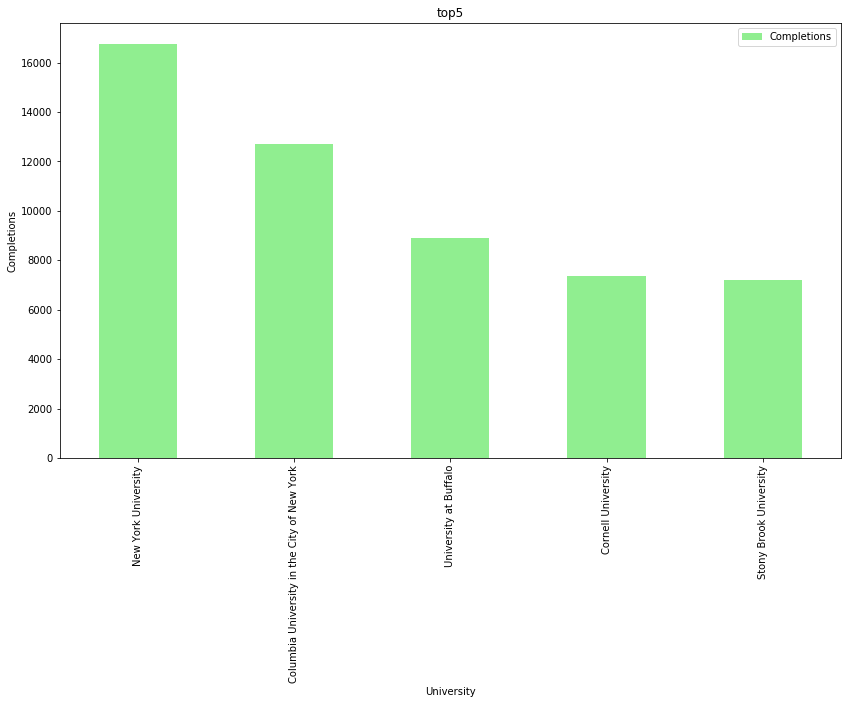

In [40]:
top5.plot(kind='bar', figsize=(14, 8),color='lightgreen')
plt.title('top5')
plt.xlabel('University')
plt.ylabel('Completions')
plt.show()

In [54]:
race=pd.read_csv('C://Users//Curry//Desktop//coursera//Student Race and Ethnicity.csv')
race.head()

,ID IPEDS Race,IPEDS Race,ID Year,Year,Completions,Geography,ID Geography,Slug Geography,share
0,hawaiian,Native Hawaiian or Other Pacific Islanders,2016,2016,550,New York,04000US36,new-york,0.001833
1,white,White,2016,2016,161944,New York,04000US36,new-york,0.539642
2,asian,Asian,2016,2016,27708,New York,04000US36,new-york,0.092331
3,multiracial,Two or More Races,2016,2016,6590,New York,04000US36,new-york,0.021960
4,native,American Indian or Alaska Native,2016,2016,955,New York,04000US36,new-york,0.003182


In [60]:
race_16=race[(race['Year']==2016)]
race_16.sort_values('Completions' ,ascending=False).head()

,ID IPEDS Race,IPEDS Race,ID Year,Year,Completions,Geography,ID Geography,Slug Geography,share
1,white,White,2016,2016,161944,New York,04000US36,new-york,0.539642
7,hispanic,Hispanic or Latino,2016,2016,45161,New York,04000US36,new-york,0.150489
5,black,Black or African American,2016,2016,39853,New York,04000US36,new-york,0.132801
2,asian,Asian,2016,2016,27708,New York,04000US36,new-york,0.092331
6,unknown,Unknown,2016,2016,17334,New York,04000US36,new-york,0.057762


In [69]:
top_race=race_16.sort_values('Completions' ,ascending=False).head()
top5_race=top_race[['ID IPEDS Race','Completions']].head()
top5_race.set_index('ID IPEDS Race', inplace=True)
top5_race.head()

,Completions
ID IPEDS Race,
white,161944
hispanic,45161
black,39853
asian,27708
unknown,17334


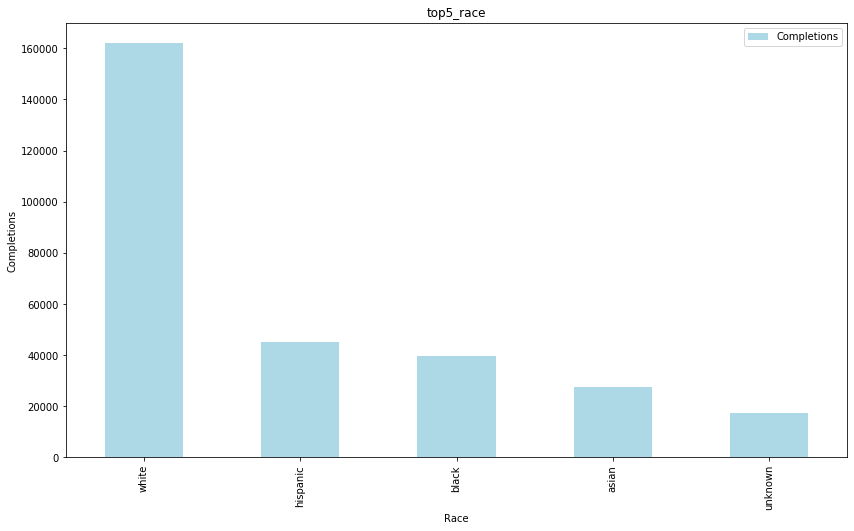

In [64]:
top5_race.plot(kind='bar', figsize=(14, 8),color='lightblue')
plt.title('top5_race')
plt.xlabel('Race')
plt.ylabel('Completions')
plt.show()

In [66]:
conc=pd.read_csv('C:\\Users\\Curry\\Desktop\\coursera\\Concentrations.csv')
conc.head()

,ID CIP2,CIP2,ID CIP4,CIP4,ID CIP6,CIP6,ID Year,Year,ID Nation,Nation,ID Degree,Degree,Completions,Slug CIP6,Geography,ID Geography,Slug Geography
0,15,Engineering Technologies,1500,General Engineering Technologies,150000,General Engineering Technology,2016,2016,01000US,United States,5,Bachelors Degree,16,general-engineering-technology,New York,04000US36,new-york
1,54,History,5401,History,540199,Other History,2016,2016,01000US,United States,5,Bachelors Degree,20,other-history,New York,04000US36,new-york
2,1,Agriculture,101,Agriculture Business & Management,10101,General Agriculture Management,2016,2016,01000US,United States,5,Bachelors Degree,50,general-agriculture-management,New York,04000US36,new-york
3,54,History,5401,History,540108,Military History,2016,2016,01000US,United States,5,Bachelors Degree,10,military-history,New York,04000US36,new-york
4,1,Agriculture,101,Agriculture Business & Management,10102,Agricultural Business Operations,2016,2016,01000US,United States,5,Bachelors Degree,0,agricultural-business-operations,New York,04000US36,new-york


In [67]:
conc_16=conc[(conc['Year']==2016)]
conc_16.sort_values('Completions' ,ascending=False).head()

,ID CIP2,CIP2,ID CIP4,CIP4,ID CIP6,CIP6,ID Year,Year,ID Nation,Nation,ID Degree,Degree,Completions,Slug CIP6,Geography,ID Geography,Slug Geography
636,42,Psychology,4201,General Psychology,420101,General Psychology,2016,2016,01000US,United States,5,Bachelors Degree,10183,general-psychology-6,New York,04000US36,new-york
149,52,Business,5202,"Business Administration, Management, & Operations",520201,General Business Administration & Management,2016,2016,01000US,United States,5,Bachelors Degree,8498,general-business-administration-management,New York,04000US36,new-york
178,51,Health,5138,"Registered Nursing, Nursing Administration, & ...",513801,Registered Nursing,2016,2016,01000US,United States,5,Bachelors Degree,7083,registered-nursing,New York,04000US36,new-york
458,26,Biology,2601,General Biology,260101,General Biological Sciences,2016,2016,01000US,United States,5,Bachelors Degree,5403,general-biological-sciences,New York,04000US36,new-york
133,52,Business,5203,Accounting,520301,Accounting,2016,2016,01000US,United States,5,Bachelors Degree,4960,accounting-6,New York,04000US36,new-york


In [68]:
top_conc=conc_16.sort_values('Completions' ,ascending=False).head(10)
top10_conc=top_conc[['CIP4','Completions']].head(10)
top10_conc.set_index('CIP4', inplace=True)
top10_conc.head(10)

,Completions
CIP4,
General Psychology,10183
"Business Administration, Management, & Operations",8498
"Registered Nursing, Nursing Administration, & Nursing Research",7083
General Biology,5403
Accounting,4960
Economics,4203
Liberal Arts & Sciences,3561
General English Language & Literature,3245
Political Science & Government,3137


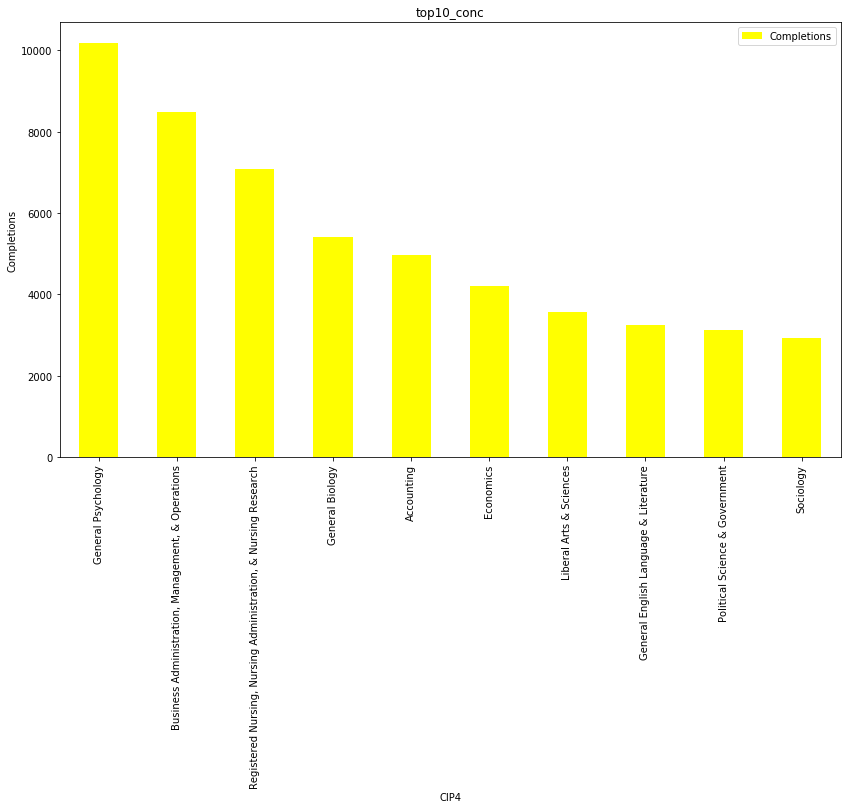

In [70]:
top10_conc.plot(kind='bar', figsize=(14, 8),color='yellow')
plt.title('top10_conc')
plt.xlabel('CIP4')
plt.ylabel('Completions')
plt.show()

In [74]:
with open('C:\\Users\\Curry\\Desktop\\coursera\\newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [75]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [76]:
neighborhoods_data = newyork_data['features']

In [77]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [78]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [79]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [80]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [81]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [82]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [83]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [95]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [84]:
CLIENT_ID = 'CSIVOKNTJK0GKB0WE5GBI11U55QX25PKAY2L0KSFQHG4PVS4' # your Foursquare ID
CLIENT_SECRET = '0QDAEI44PBMIQYAHZXGZSY0KJ5G5NYTFGP1OGZHSNCALAUC0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CSIVOKNTJK0GKB0WE5GBI11U55QX25PKAY2L0KSFQHG4PVS4
CLIENT_SECRET:0QDAEI44PBMIQYAHZXGZSY0KJ5G5NYTFGP1OGZHSNCALAUC0


In [87]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [88]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [96]:
manhattan_data.loc[18, 'Neighborhood']

'Greenwich Village'

In [97]:
neighborhood_latitude = manhattan_data.loc[18, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[18, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[18, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Greenwich Village are 40.72693288536128, -73.99991402945902.


In [98]:
LIMIT = 100 # limit of number of venues returned by Foursquare API



radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url 


'https://api.foursquare.com/v2/venues/explore?&client_id=CSIVOKNTJK0GKB0WE5GBI11U55QX25PKAY2L0KSFQHG4PVS4&client_secret=0QDAEI44PBMIQYAHZXGZSY0KJ5G5NYTFGP1OGZHSNCALAUC0&v=20180605&ll=40.72693288536128,-73.99991402945902&radius=500&limit=100'

In [99]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5da0af94446ea6002c80341b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Greenwich Village',
  'headerFullLocation': 'Greenwich Village, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 238,
  'suggestedBounds': {'ne': {'lat': 40.73143288986128,
    'lng': -73.99398708545141},
   'sw': {'lat': 40.72243288086128, 'lng': -74.00584097346663}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '50002274e4b0deb8db4eea3b',
       'name': 'Chobani',
       'location': {'address': '152 Prince St',
        'crossStreet': 'at W Broadway',
        'lat': 40.72581867292355,
        'lng': -7

In [100]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [126]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,Chobani,Snack Place,40.725819,-74.000985
1,Local,Beer Bar,40.727089,-74.001912
2,DomoDomo,Sushi Restaurant,40.728007,-74.001683
3,Carbone,Italian Restaurant,40.727903,-74.000136
4,Banter,Café,40.727959,-74.001205
5,La Colombe Torrefaction,Coffee Shop,40.725820,-74.001192
6,Rapha NYC,Clothing Store,40.725968,-74.001226
7,Miss Lily's & Melvin's Juice Box,Caribbean Restaurant,40.727916,-74.001423
8,Summers Juice & Coffee,Café,40.727640,-74.000316
9,Raffetto's,Gourmet Shop,40.728010,-74.001949


In [102]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [103]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [105]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [106]:
print(manhattan_venues.shape)
manhattan_venues.head()

(3319, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


In [107]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,99,99,99,99,99,99
Carnegie Hill,100,100,100,100,100,100
Central Harlem,45,45,45,45,45,45
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,42,42,42,42,42,42
East Village,100,100,100,100,100,100


In [108]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 335 uniques categories.


In [109]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai

In [110]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Comfort Food Restaurant,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Nightlife,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai

In [111]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
           venue  freq
0           Park  0.08
1    Coffee Shop  0.06
2          Hotel  0.05
3            Gym  0.04
4  Memorial Site  0.04


----Carnegie Hill----
               venue  freq
0        Coffee Shop  0.06
1        Pizza Place  0.06
2               Café  0.05
3        Yoga Studio  0.03
4  French Restaurant  0.03


----Central Harlem----
                venue  freq
0  Seafood Restaurant  0.04
1   French Restaurant  0.04
2  Chinese Restaurant  0.04
3      Cosmetics Shop  0.04
4                 Bar  0.04


----Chelsea----
                venue  freq
0         Coffee Shop  0.06
1  Italian Restaurant  0.05
2              Bakery  0.05
3      Ice Cream Shop  0.05
4             Theater  0.03


----Chinatown----
                 venue  freq
0   Chinese Restaurant  0.09
1         Cocktail Bar  0.05
2  American Restaurant  0.04
3               Bakery  0.03
4   Salon / Barbershop  0.03


----Civic Center----
                  venue  freq
0  Gym / Fitness Center 

In [112]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [117]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(13)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Memorial Site,Gym,Boat or Ferry,Wine Shop,Grocery Store,Food Court,Shopping Mall
1,Carnegie Hill,Pizza Place,Coffee Shop,Café,Yoga Studio,Wine Shop,Cosmetics Shop,Bookstore,Japanese Restaurant,Bar,Spa
2,Central Harlem,French Restaurant,American Restaurant,Bar,Seafood Restaurant,Cosmetics Shop,Chinese Restaurant,African Restaurant,Park,Cafeteria,Market
3,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Hotel,Theater,Seafood Restaurant,Nightclub,American Restaurant,Cupcake Shop
4,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Bubble Tea Shop,Bakery,Vietnamese Restaurant,Spa,Salon / Barbershop,Dessert Shop,Sandwich Place
5,Civic Center,Gym / Fitness Center,Italian Restaurant,Coffee Shop,Sandwich Place,French Restaurant,Hotel,Yoga Studio,Cocktail Bar,Spa,Sporting Goods Shop
6,Clinton,Theater,Gym / Fitness Center,American Restaurant,Italian Restaurant,Wine Shop,Gym,Spa,Hotel,Bar,Coffee Shop
7,East Harlem,Mexican Restaurant,Deli / Bodega,Bakery,Latin American Restaurant,Thai Restaurant,Taco Place,Donut Shop,Cocktail Bar,Beer Bar,Liquor Store
8,East Village,Ice Cream Shop,Bar,Wine Bar,Pizza Place,Mexican Restaurant,Chinese Restaurant,Cocktail Bar,Ramen Restaurant,Vegetarian / Vegan Restaurant,Dessert Shop
9,Financial District,Coffee Shop,Wine Shop,Hotel,American Restaurant,Pizza Place,Gym,Event Space,Café,Gym / Fitness Center,Mediterranean Restaurant


In [118]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 1, 2, 1, 2, 2, 0, 1, 1])

In [119]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,4,Sandwich Place,Coffee Shop,Yoga Studio,Deli / Bodega,Supplement Shop,Steakhouse,Shopping Mall,Seafood Restaurant,Pizza Place,Department Store
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Cocktail Bar,American Restaurant,Bubble Tea Shop,Bakery,Vietnamese Restaurant,Spa,Salon / Barbershop,Dessert Shop,Sandwich Place
2,Manhattan,Washington Heights,40.851903,-73.936900,0,Bakery,Café,Mobile Phone Shop,Pizza Place,Chinese Restaurant,Coffee Shop,Bank,Spanish Restaurant,Park,Deli / Bodega
3,Manhattan,Inwood,40.867684,-73.921210,0,Mexican Restaurant,Café,Lounge,Pizza Place,Restaurant,Bakery,Frozen Yogurt Shop,Deli / Bodega,Spanish Restaurant,Chinese Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Café,Mexican Restaurant,Pizza Place,Coffee Shop,Yoga Studio,Park,Caribbean Restaurant,Chinese Restaurant,Bakery,School


In [120]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [121]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Washington Heights,Bakery,Café,Mobile Phone Shop,Pizza Place,Chinese Restaurant,Coffee Shop,Bank,Spanish Restaurant,Park,Deli / Bodega
3,Inwood,Mexican Restaurant,Café,Lounge,Pizza Place,Restaurant,Bakery,Frozen Yogurt Shop,Deli / Bodega,Spanish Restaurant,Chinese Restaurant
4,Hamilton Heights,Café,Mexican Restaurant,Pizza Place,Coffee Shop,Yoga Studio,Park,Caribbean Restaurant,Chinese Restaurant,Bakery,School
7,East Harlem,Mexican Restaurant,Deli / Bodega,Bakery,Latin American Restaurant,Thai Restaurant,Taco Place,Donut Shop,Cocktail Bar,Beer Bar,Liquor Store
25,Manhattan Valley,Bar,Pizza Place,Coffee Shop,Indian Restaurant,Yoga Studio,Mexican Restaurant,Szechuan Restaurant,Thai Restaurant,Café,Playground
36,Tudor City,Park,Mexican Restaurant,Café,Sushi Restaurant,Greek Restaurant,Deli / Bodega,Pizza Place,Restaurant,Burger Joint,Coffee Shop


In [122]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Bubble Tea Shop,Bakery,Vietnamese Restaurant,Spa,Salon / Barbershop,Dessert Shop,Sandwich Place
5,Manhattanville,Coffee Shop,Park,Seafood Restaurant,Italian Restaurant,Mexican Restaurant,Cuban Restaurant,Food Truck,Liquor Store,Bike Trail,Lounge
6,Central Harlem,French Restaurant,American Restaurant,Bar,Seafood Restaurant,Cosmetics Shop,Chinese Restaurant,African Restaurant,Park,Cafeteria,Market
9,Yorkville,Coffee Shop,Italian Restaurant,Gym,Bar,Pizza Place,Deli / Bodega,Wine Shop,Sushi Restaurant,Diner,Japanese Restaurant
10,Lenox Hill,Coffee Shop,Italian Restaurant,Pizza Place,Sushi Restaurant,Gym / Fitness Center,Burger Joint,Café,Sporting Goods Shop,Gym,Thai Restaurant
11,Roosevelt Island,Coffee Shop,Park,Sandwich Place,Dry Cleaner,Gym,Greek Restaurant,Bus Line,Liquor Store,Scenic Lookout,Dog Run
12,Upper West Side,Italian Restaurant,Bar,Wine Bar,Coffee Shop,Cosmetics Shop,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Bakery,American Restaurant
16,Murray Hill,Coffee Shop,Japanese Restaurant,Sandwich Place,Gym,Bar,Hotel,American Restaurant,Italian Restaurant,Gym / Fitness Center,Sushi Restaurant
19,East Village,Ice Cream Shop,Bar,Wine Bar,Pizza Place,Mexican Restaurant,Chinese Restaurant,Cocktail Bar,Ramen Restaurant,Vegetarian / Vegan Restaurant,Dessert Shop
20,Lower East Side,Café,Chinese Restaurant,Pizza Place,Bakery,Coffee Shop,Japanese Restaurant,Art Gallery,Ramen Restaurant,Cocktail Bar,Park


In [123]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Upper East Side,Italian Restaurant,Exhibit,Bakery,Art Gallery,Coffee Shop,Hotel,Gym / Fitness Center,French Restaurant,Juice Bar,Gourmet Shop
13,Lincoln Square,Theater,Café,Concert Hall,Plaza,Italian Restaurant,Gym / Fitness Center,Performing Arts Venue,Indie Movie Theater,Park,French Restaurant
14,Clinton,Theater,Gym / Fitness Center,American Restaurant,Italian Restaurant,Wine Shop,Gym,Spa,Hotel,Bar,Coffee Shop
15,Midtown,Hotel,Clothing Store,Theater,Coffee Shop,Sporting Goods Shop,Japanese Restaurant,Bookstore,Bakery,Spa,Steakhouse
17,Chelsea,Coffee Shop,Italian Restaurant,Ice Cream Shop,Bakery,Hotel,Theater,Seafood Restaurant,Nightclub,American Restaurant,Cupcake Shop
18,Greenwich Village,Italian Restaurant,Sushi Restaurant,Clothing Store,Indian Restaurant,French Restaurant,Café,Seafood Restaurant,Cosmetics Shop,Caribbean Restaurant,Gourmet Shop
21,Tribeca,Park,Italian Restaurant,Spa,American Restaurant,Café,Gym,Coffee Shop,Boutique,Wine Bar,Greek Restaurant
22,Little Italy,Bakery,Italian Restaurant,Café,Sandwich Place,Clothing Store,Mediterranean Restaurant,Seafood Restaurant,Ice Cream Shop,Salon / Barbershop,Massage Studio
23,Soho,Clothing Store,Boutique,Furniture / Home Store,Art Gallery,Shoe Store,Women's Store,Sporting Goods Shop,Bakery,Men's Store,Mediterranean Restaurant
24,West Village,Italian Restaurant,New American Restaurant,Cosmetics Shop,Park,Wine Bar,American Restaurant,Cocktail Bar,Theater,Jazz Club,Coffee Shop


In [124]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Bar,Park,Baseball Field,Gas Station,Tennis Court,Basketball Court,German Restaurant,Cocktail Bar,Harbor / Marina,Farmers Market


In [125]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Sandwich Place,Coffee Shop,Yoga Studio,Deli / Bodega,Supplement Shop,Steakhouse,Shopping Mall,Seafood Restaurant,Pizza Place,Department Store
